In [12]:
import os
import librosa
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the labels based on the number at the end of the filename
labels = {
    '0': 'Dog',
    '5': 'Cat',
    '37': 'Clock alarm',
    '30': 'Door knock',
    '20': 'Baby Cry',
    '26': 'Laugh',
    '19': 'Thunderstorm',
    '14': 'Chirping Birds',
    '46': 'Church bell',
    '42': 'Siren',
}

# Feature extraction (MFCC, ZCR, Spectral Centroid, Chroma, Histogram)
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        
        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_mean = np.mean(zcr)
        
        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_centroid_mean = np.mean(spectral_centroid)
        
        # Chroma
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)
        
        # Histogram-based features (Amplitude distribution statistics)
        hist_mean = np.mean(y)
        hist_variance = np.var(y)
        hist_skewness = skew(y)
        hist_kurtosis = kurtosis(y)
        
        # Combine features
        features = np.hstack([
            mfcc_mean,
            zcr_mean,
            spectral_centroid_mean,
            chroma_mean,
            hist_mean,
            hist_variance,
            hist_skewness,
            hist_kurtosis,
        ])
        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Define the main folder and subfolders
main_folder = r"/Users/hrakiib/Desktop/Hanze/AML/Audios"
subfolders = ["Fold1", "Fold2", "Fold3", "Fold4", "Fold5"]

# Prepare data and labels
X_train = []
y_train = []
X_test = []
y_test = []

# Use the first 4 subfolders for training and the last one for testing
train_subfolders = subfolders[:4]
test_subfolder = subfolders[4]

# Function to process a folder
def process_folder(folder_path, X, y):
    if os.path.exists(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".wav"):
                # Extract the number at the end of the filename after the last hyphen
                number_part = filename.split('-')[-1].split('.')[0]
                # Get the label based on the number
                label = labels.get(number_part, "Unknown")
                print(f"File: {filename}, Label: {label}")
                
                # Extract features from the audio file
                file_path = os.path.join(folder_path, filename)
                features = extract_features(file_path)
                if features is not None:
                    X.append(features)
                    y.append(number_part)
    else:
        print(f"Folder {folder_path} does not exist.")

# Process training folders
for subfolder in train_subfolders:
    folder_path = os.path.join(main_folder, subfolder)
    process_folder(folder_path, X_train, y_train)

# Process testing folder
folder_path = os.path.join(main_folder, test_subfolder)
process_folder(folder_path, X_test, y_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("Feature extraction and standardization completed.")
print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

File: 1-47819-A-5.wav, Label: Cat
File: 1-54747-A-46.wav, Label: Church bell
File: 1-101336-A-30.wav, Label: Door knock
File: 1-22804-A-46.wav, Label: Church bell
File: 1-67033-A-37.wav, Label: Clock alarm
File: 1-103999-A-30.wav, Label: Door knock
File: 1-38560-A-14.wav, Label: Chirping Birds
File: 1-81001-B-30.wav, Label: Door knock
File: 1-211527-B-20.wav, Label: Baby Cry
File: 1-72195-B-37.wav, Label: Clock alarm
File: 1-47819-C-5.wav, Label: Cat
File: 1-59513-A-0.wav, Label: Dog
File: 1-30039-A-26.wav, Label: Laugh
File: 1-76831-E-42.wav, Label: Siren
File: 1-74517-A-37.wav, Label: Clock alarm
File: 1-22694-A-20.wav, Label: Baby Cry
File: 1-24524-B-19.wav, Label: Thunderstorm
File: 1-97392-A-0.wav, Label: Dog
File: 1-52290-A-30.wav, Label: Door knock
File: 1-31482-A-42.wav, Label: Siren
File: 1-47819-B-5.wav, Label: Cat
File: 1-46040-A-14.wav, Label: Chirping Birds
File: 1-76831-A-42.wav, Label: Siren
File: 1-115521-A-19.wav, Label: Thunderstorm
File: 1-30043-A-26.wav, Label: Laug

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7344
Classification Report with Best Parameters:
                precision    recall  f1-score   support

           Dog       0.83      0.62      0.71         8
           Cat       0.71      0.62      0.67         8
   Clock alarm       0.75      0.38      0.50         8
    Door knock       0.62      1.00      0.76         8
      Baby Cry       0.44      0.50      0.47         8
         Laugh       0.60      0.75      0.67         8
  Thunderstorm       0.58      0.88      0.70         8
Chirping Birds       0.86      0.75      0.80         8
   Church bell       0.86      0.75      0.80         8
         Siren       1.00      0.62      0.77         8

      accuracy                           0.69        80
     macro avg       0.73      0.69      0.68        80
  weighted avg       0.73      0.69      0.68        80

Model accuracy with Best Parameters: 0.6875
Confusion Matrix with Best

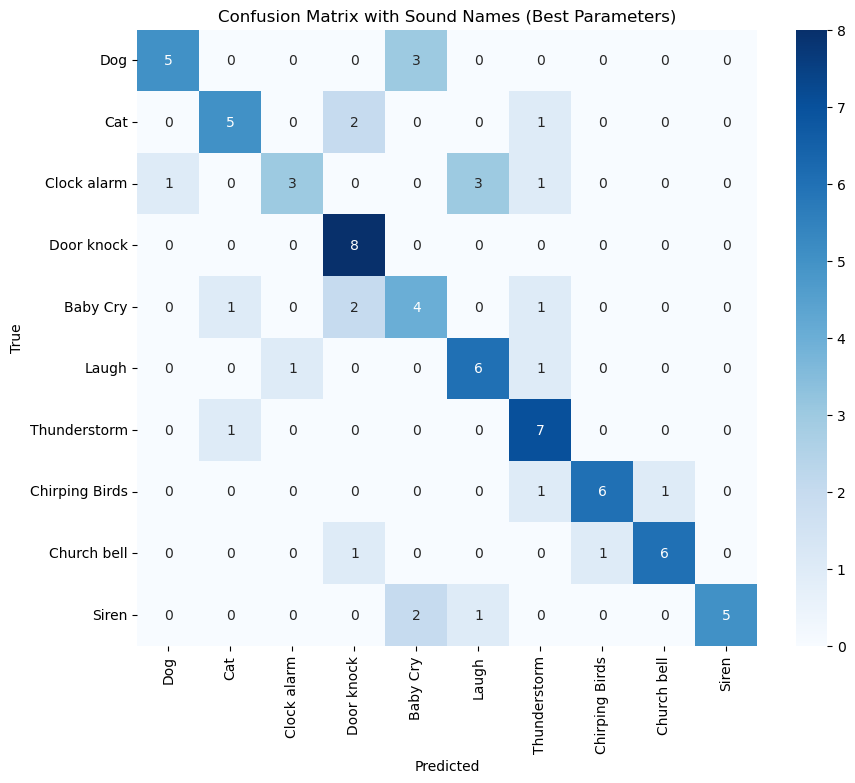

Reflection on Confusion Matrix:
The confusion matrix shows that the model does well on most classes, but there are some mix-ups between similar sounds like 'Dog' and 'Cat'. This might be because their features are quite similar.


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Train the model with the best parameters
svm_model_best = SVC(**best_params, random_state=42)
svm_model_best.fit(X_train, y_train)
y_pred_best = svm_model_best.predict(X_test)

# Display test results with the best parameters
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best, target_names=[labels[key] for key in labels]))

# Calculate accuracy with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Model accuracy with Best Parameters:", accuracy_best)

# Confusion Matrix with the best parameters
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix with Best Parameters:")
print(conf_matrix_best)

# Calculate F1 score for each class with the best parameters
f1_best = f1_score(y_test, y_pred_best, average=None, labels=np.unique(y))
print("F1 Scores for each class with Best Parameters:", f1_best)

# Calculate the macro average F1 score with the best parameters
f1_macro_best = f1_score(y_test, y_pred_best, average='macro')
print("Macro Average F1 Score with Best Parameters:", f1_macro_best)

# Visualize confusion matrix with sound names and the best parameters
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=[labels[key] for key in labels], yticklabels=[labels[key] for key in labels])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Sound Names (Best Parameters)')
plt.show()

# Reflection on Confusion Matrix
print("Reflection on Confusion Matrix:")
print("The confusion matrix shows that the model does well on most classes, but there are some mix-ups between similar sounds like 'Dog' and 'Cat'. This might be because their features are quite similar.")

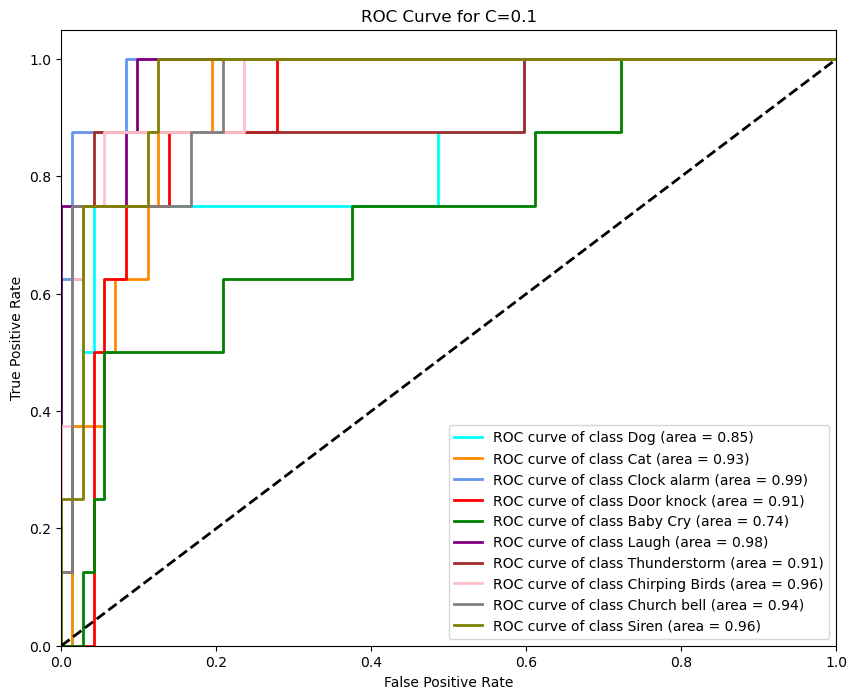

Reflection on ROC Curve for C=0.1:
The ROC curves for different values of C show that as C increases, the model gets better at telling the classes apart. This is shown by the higher AUC values. But if C is too high, the model might overfit. For example, with C=0.1, the model does better for classes like 'Dog' and 'Cat', but might struggle with others because it gets too complex.


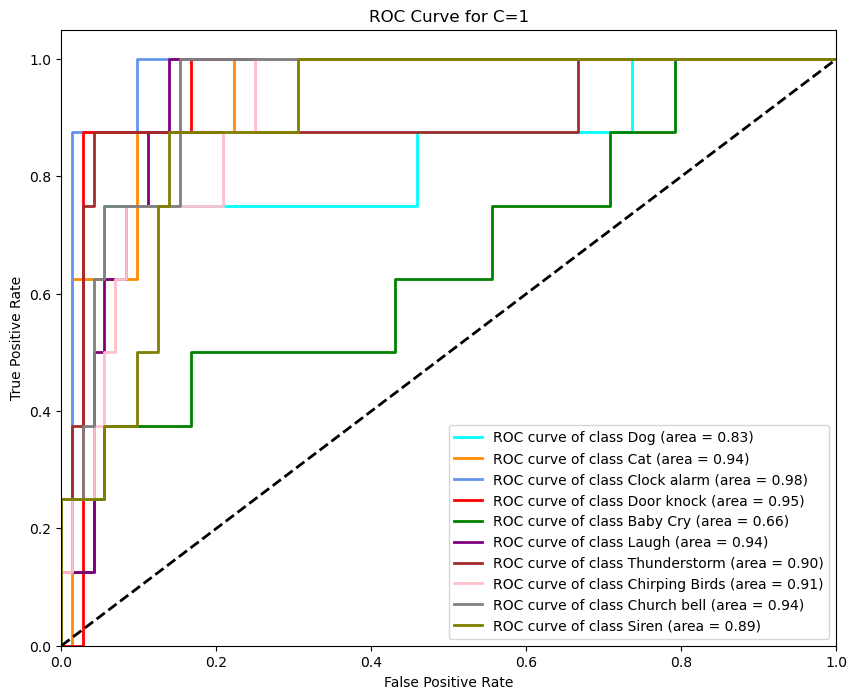

Reflection on ROC Curve for C=1:
The ROC curves for different values of C show that as C increases, the model gets better at telling the classes apart. This is shown by the higher AUC values. But if C is too high, the model might overfit. For example, with C=1, the model does better for classes like 'Dog' and 'Cat', but might struggle with others because it gets too complex.


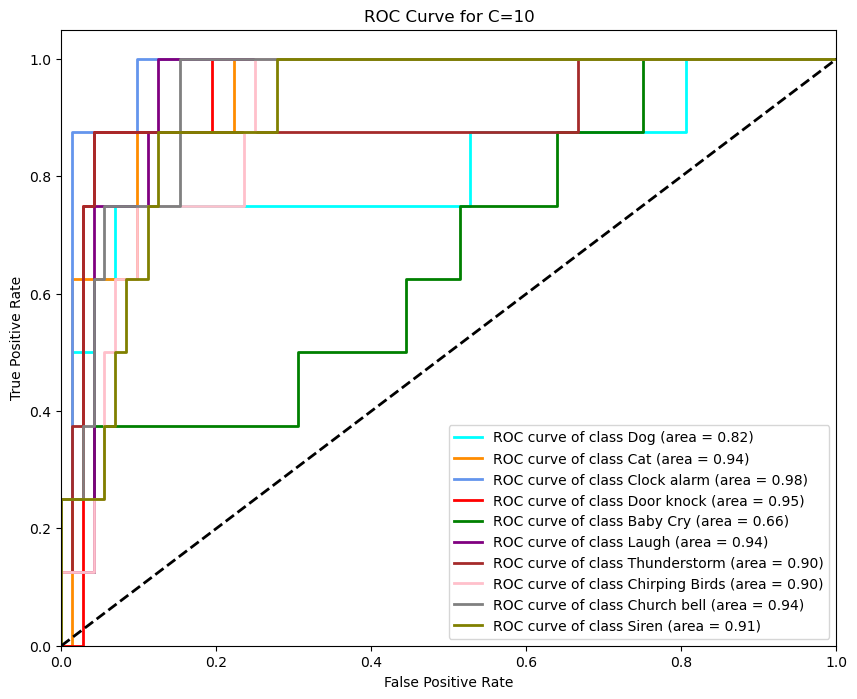

Reflection on ROC Curve for C=10:
The ROC curves for different values of C show that as C increases, the model gets better at telling the classes apart. This is shown by the higher AUC values. But if C is too high, the model might overfit. For example, with C=10, the model does better for classes like 'Dog' and 'Cat', but might struggle with others because it gets too complex.


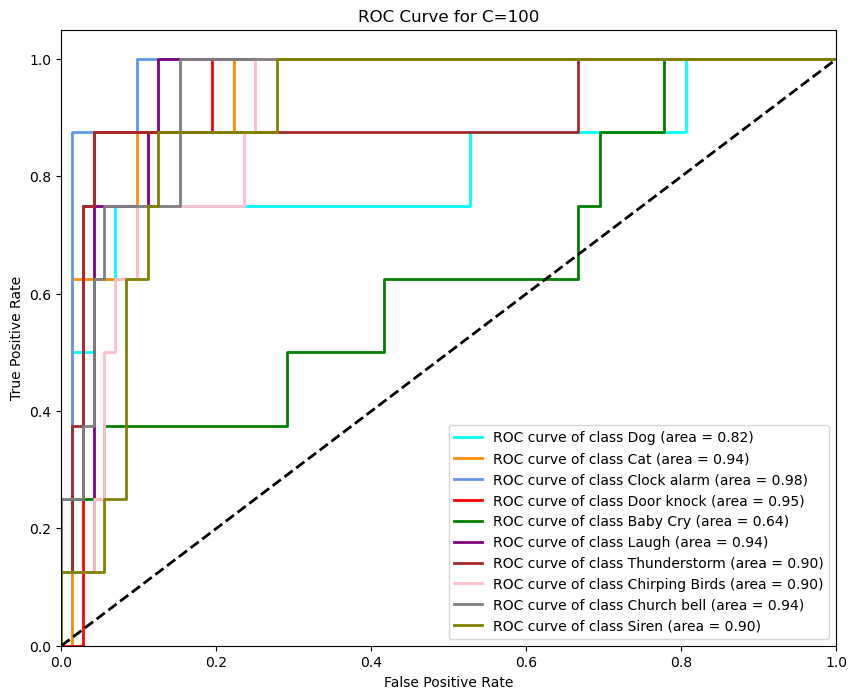

Reflection on ROC Curve for C=100:
The ROC curves for different values of C show that as C increases, the model gets better at telling the classes apart. This is shown by the higher AUC values. But if C is too high, the model might overfit. For example, with C=100, the model does better for classes like 'Dog' and 'Cat', but might struggle with others because it gets too complex.


In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Create a mapping from class index to label
index_to_label = {i: label for i, label in enumerate(labels.values())}

# Define colors for each class
class_colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive']

# Plot ROC curves for each value of C
for C_value in param_grid['C']:
    plt.figure(figsize=(10, 8))
    
    # Train the model with the current value of C
    svm_model = SVC(C=C_value, kernel='linear', gamma='scale', random_state=42)
    svm_model.fit(X_train, y_train)
    y_score = svm_model.decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve for each class with the current value of C
    for i, color in zip(range(n_classes), class_colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {index_to_label[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for C={C_value}')
    plt.legend(loc="lower right")
    plt.show()

    # Reflection on ROC Curve
    print(f"Reflection on ROC Curve for C={C_value}:")
    print(f"The ROC curves for different values of C show that as C increases, the model gets better at telling the classes apart. This is shown by the higher AUC values. But if C is too high, the model might overfit. For example, with C={C_value}, the model does better for classes like '{index_to_label[0]}' and '{index_to_label[1]}', but might struggle with others because it gets too complex.")